In [15]:
from i308_calib import *
from i308_utils import *
import cv2
import pickle
import sys
import os
import matplotlib.pyplot as plt
# import stereodemo
import numpy as np
import open3d as o3d

sys.path.append(os.path.abspath(os.path.join("..", "src")))
from calib_funcs import *
from rect_funcs import *
from pnp_funcs import *
from disparity_funcs import *
from reconstruct_funcs import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
path = "../datasets/own_data/stereo_calibration.pkl"
with open(path, "rb") as f:
    calibration_results = pickle.load(f)

In [17]:
path = "../datasets/own_data/stereo_maps.pkl"
with open(path, "rb") as f:
    rectification_results = pickle.load(f)

In [18]:
print(calibration_results.keys())
print(rectification_results.keys())

dict_keys(['left_K', 'left_dist', 'right_K', 'right_dist', 'R', 'T', 'E', 'F', 'image_size'])
dict_keys(['left_map_x', 'left_map_y', 'right_map_x', 'right_map_y', 'R1', 'R2', 'P1', 'P2', 'Q', 'validRoi1', 'validRoi2'])


In [19]:
images_path = "../datasets/own_data/duck/captures"
prefix = ""
ext = "jpg"
print_info = True
left_images, right_images = get_images(images_path, prefix, ext, print_info)

Found 7 left images and 7 right images
First left image: ..\datasets\own_data\duck\captures\left_11.jpg
First right image: ..\datasets\own_data\duck\captures\right_11.jpg


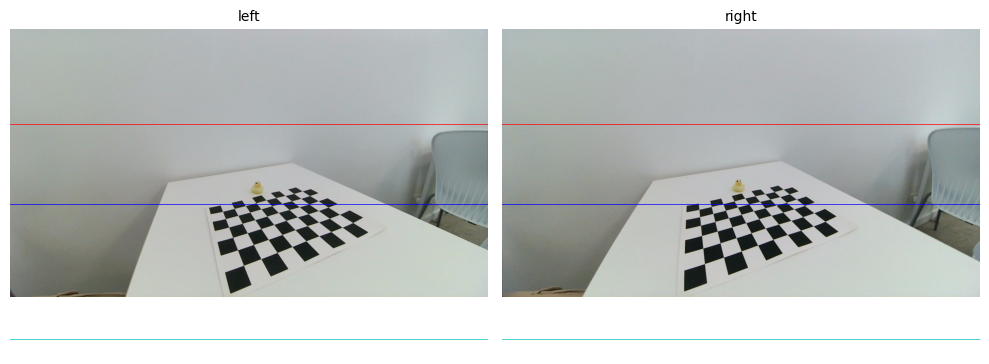

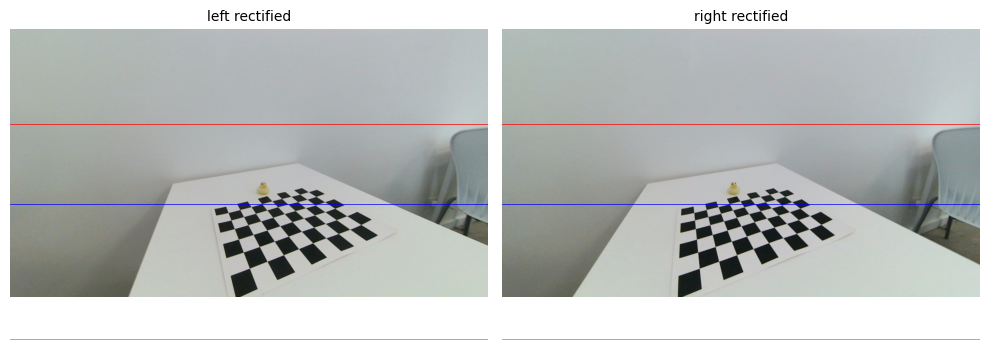

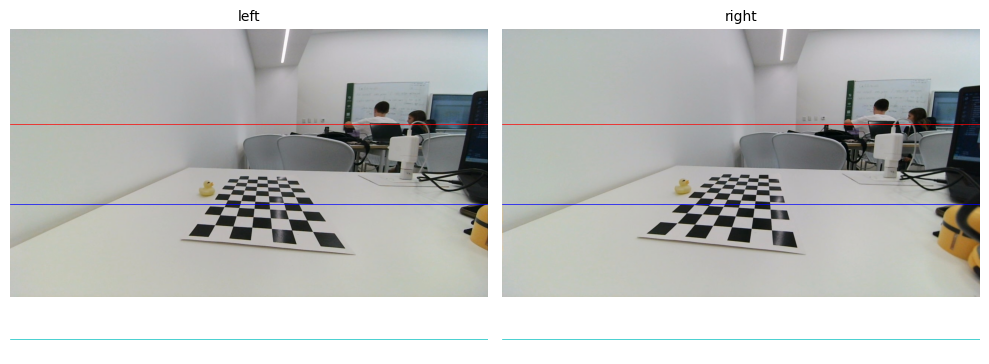

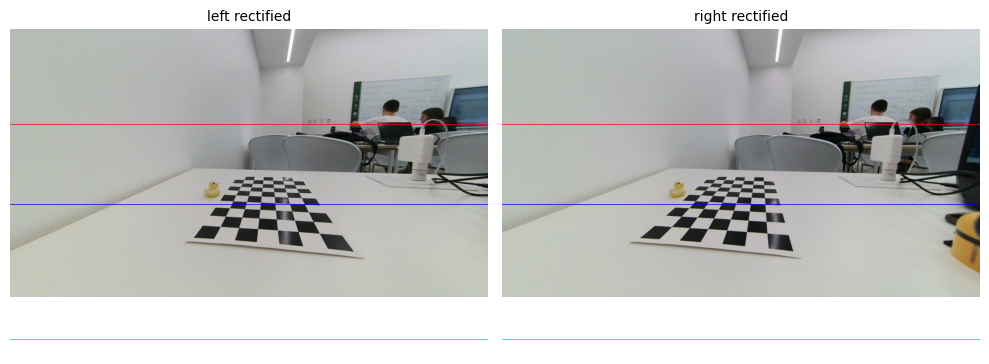

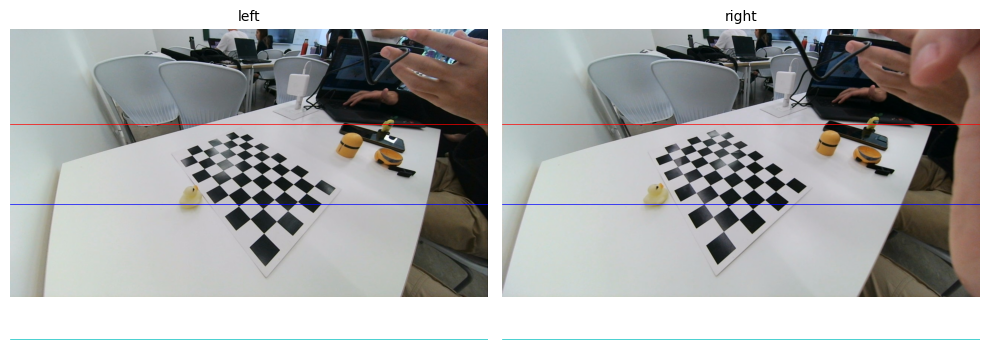

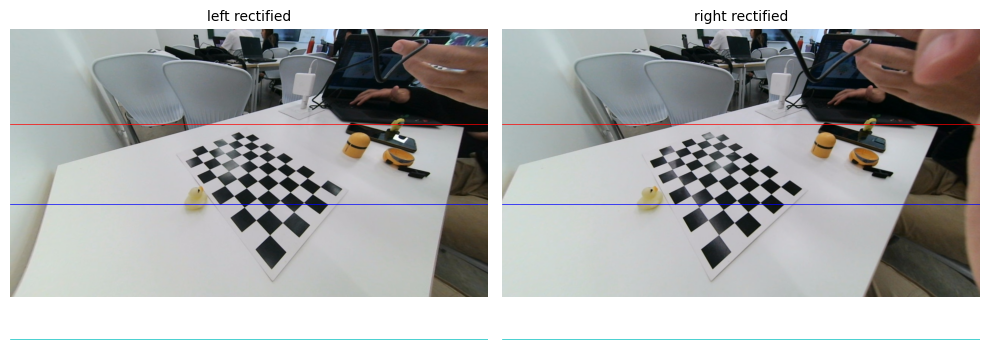

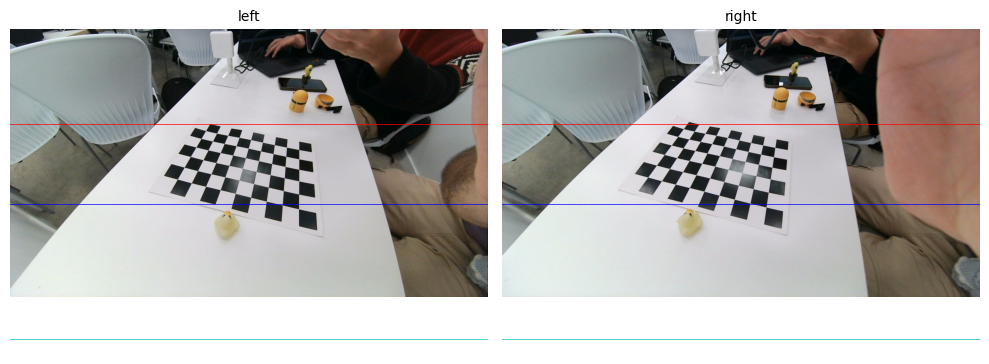

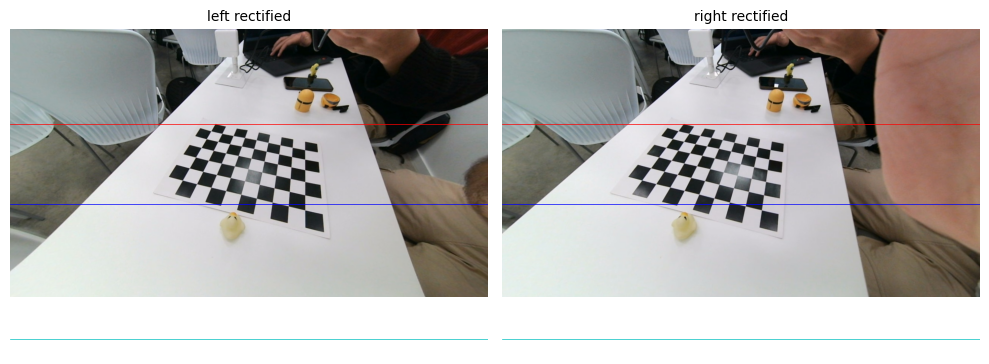

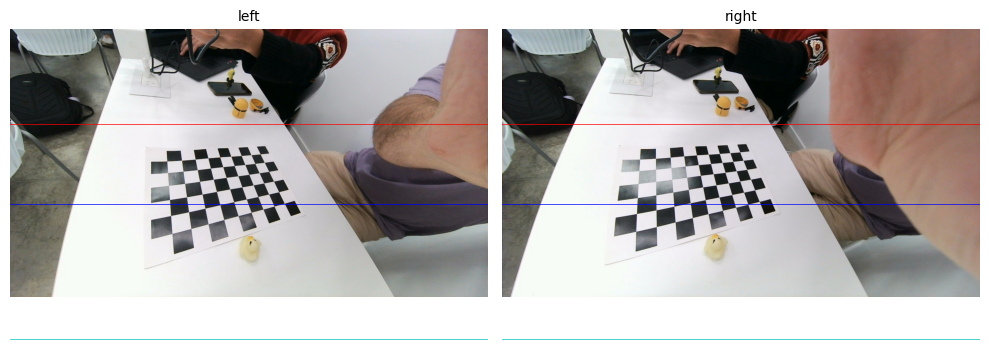

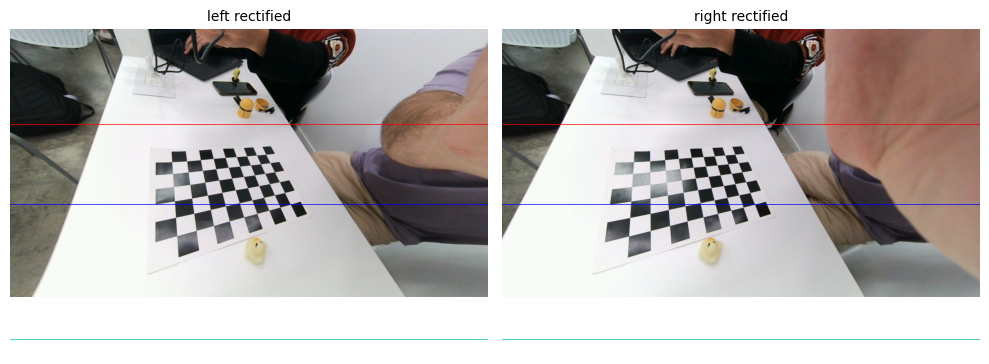

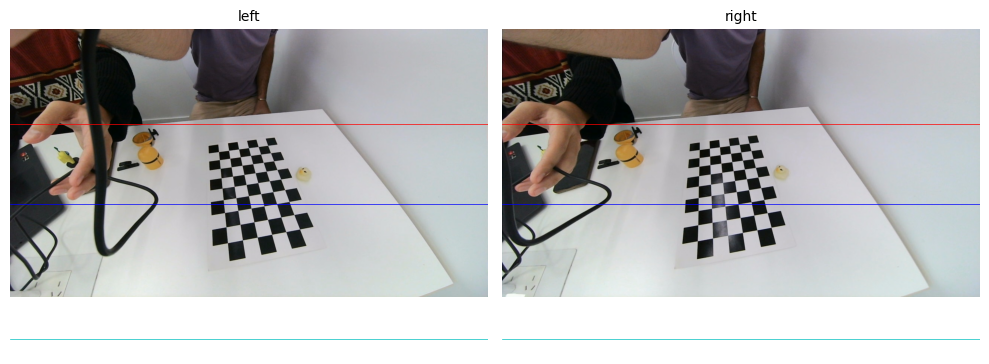

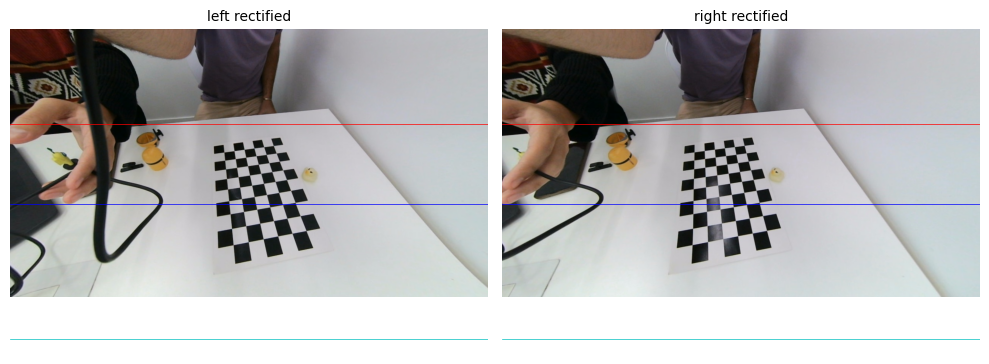

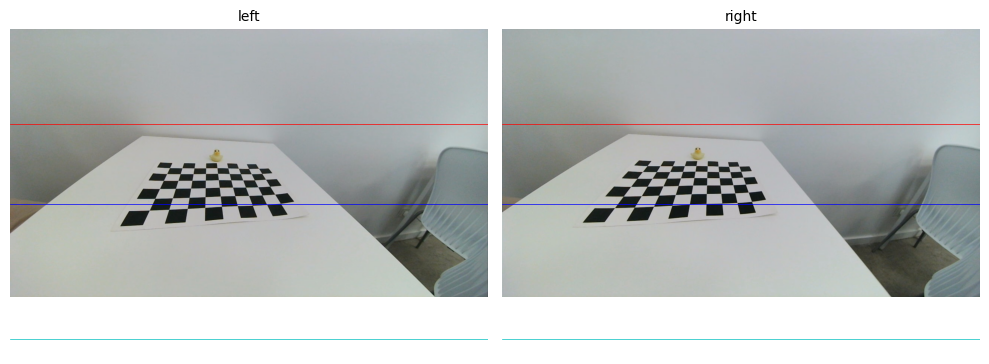

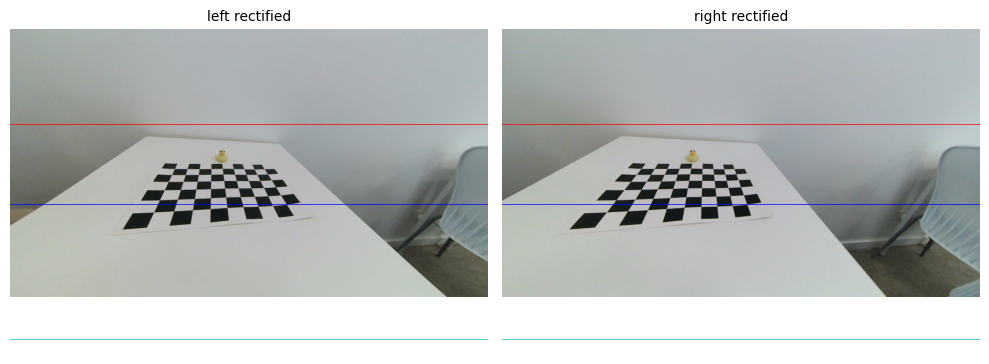

In [20]:
left_rectified_images, right_rectified_images = rectify_images(left_images, right_images, rectification_results, show=True)

In [21]:
left_rectified_image = left_rectified_images[0]
right_rectified_image = right_rectified_images[0]
w, h = left_rectified_images[0].shape[1], left_rectified_images[0].shape[0]
calibration = get_calibration_disparity(w, h, calibration_results)
disparity = get_disparity_image(left_rectified_image, right_rectified_image, calibration)

C:\Users\Lucio\.cache\stereodemo\models\crestereo_combined_iter10_720x1280.onnx


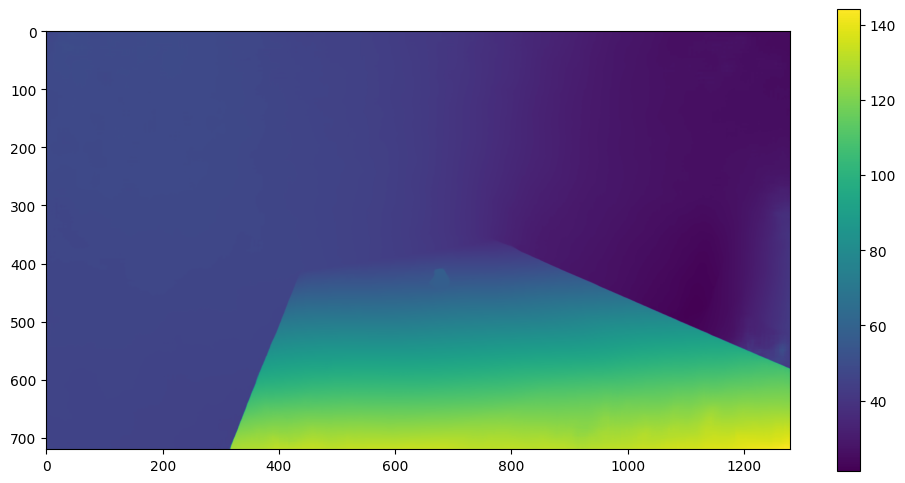

In [22]:
plt.figure(figsize=(12, 6))
plt.imshow(disparity)
plt.colorbar()
plt.show()

In [23]:
# import numpy as np

# # Supongamos que 'disparity_map' es tu matriz de disparidad en formato numpy array
# max_disparity_threshold = 120  # Ajustable según el caso

# # Opcional: crear una copia para preservar el original
# filtered_disparity = np.copy(disparity.disparity_pixels)

# # Anular valores por encima del umbral
# filtered_disparity[filtered_disparity > max_disparity_threshold] = 0


In [24]:
# plt.figure(figsize=(12, 6))
# plt.imshow(filtered_disparity)
# plt.colorbar()
# plt.show()

In [25]:
# import cv2

# # Supongamos que la disparidad está en float32, se normaliza
# norm_disp = cv2.normalize(disparity.disparity_pixels, None, 0, 255, cv2.NORM_MINMAX)
# norm_disp = np.uint8(norm_disp)

# # Umbral binario para aislar la zona brillante
# _, mask = cv2.threshold(norm_disp, 180, 255, cv2.THRESH_BINARY)  # ajustar 180 según sea necesario

# # Aplicar morfología para eliminar pequeñas regiones
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
# mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# # Eliminar los valores enmascarados del mapa de disparidad
# filtered_disparity = np.copy(disparity.disparity_pixels)
# filtered_disparity[mask > 0] = 0


In [26]:
# plt.figure(figsize=(12, 6))
# plt.imshow(filtered_disparity)
# plt.colorbar()
# plt.show()

In [27]:
# def compute_depth(disparity_map, f, B, default=1000.0):

#     # Crea una copia del mapa de disparidad
#     disparity_map = disparity_map.copy()
    
#     # Evita divisiones por cero o disparidades negativas (les asignamos el valor default)
#     mask_invalid = (disparity_map <= 0)
    
#     # Calcula la profundidad con la fórmula Z = f * B / disparidad
#     depth_map = np.zeros_like(disparity_map, dtype=np.float32)
#     depth_map[~mask_invalid] = (f * B) / disparity_map[~mask_invalid]
    
#     # Asigna valor fijo a los puntos donde la disparidad es inválida
#     depth_map[mask_invalid] = default
    
#     return depth_map

# # disparity = np.load("disparity.npz")["arr_0"]
# disparity_map = disparity.disparity_pixels

# f = left_K[0][0]
# B = np.linalg.norm(T) 

# depth = compute_depth(disparity_map, f, B)

# plt.figure(figsize=(12, 6))
# plt.imshow(depth)
# plt.colorbar()
# plt.show()

In [28]:
disparities = get_disparity_images(left_rectified_images, right_rectified_images, calibration_results)

C:\Users\Lucio\.cache\stereodemo\models\crestereo_combined_iter10_720x1280.onnx
C:\Users\Lucio\.cache\stereodemo\models\crestereo_combined_iter10_720x1280.onnx
C:\Users\Lucio\.cache\stereodemo\models\crestereo_combined_iter10_720x1280.onnx
C:\Users\Lucio\.cache\stereodemo\models\crestereo_combined_iter10_720x1280.onnx
C:\Users\Lucio\.cache\stereodemo\models\crestereo_combined_iter10_720x1280.onnx
C:\Users\Lucio\.cache\stereodemo\models\crestereo_combined_iter10_720x1280.onnx
C:\Users\Lucio\.cache\stereodemo\models\crestereo_combined_iter10_720x1280.onnx


In [29]:
path = "../datasets/own_data/duck/duck_disparities.pkl"
with open(path, "wb") as f:
    pickle.dump(disparities, f)

In [30]:
path = "../datasets/own_data/duck/duck_disparities.pkl"
with open(path, "rb") as f:
    disparities = pickle.load(f)

left corners found: True for image 0


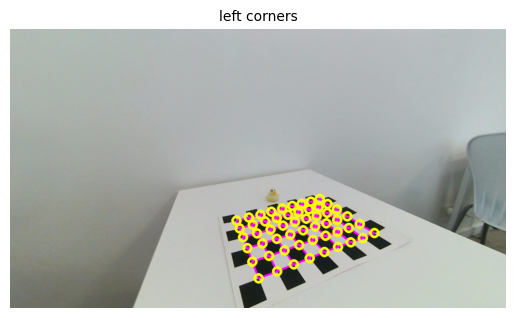

left corners found: True for image 1


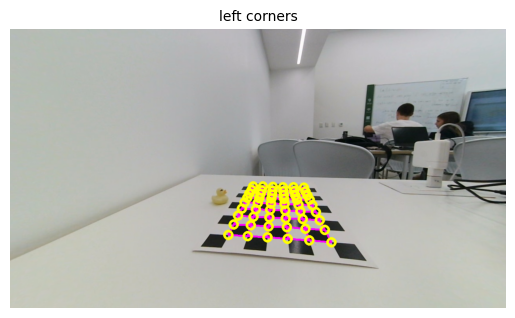

left corners found: True for image 2


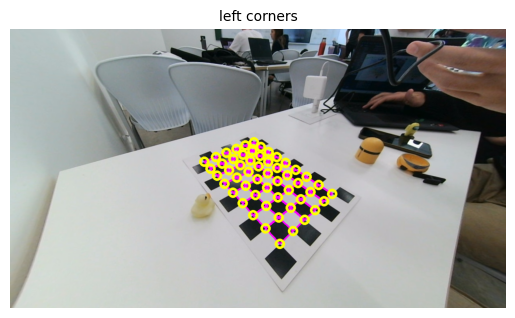

left corners found: True for image 3


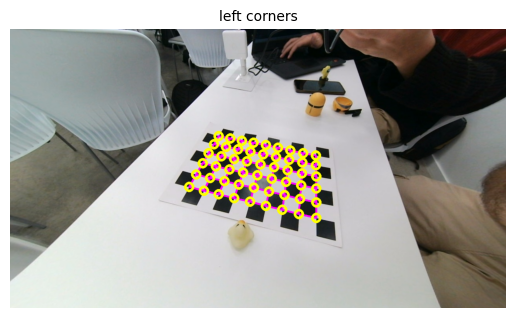

left corners found: True for image 4


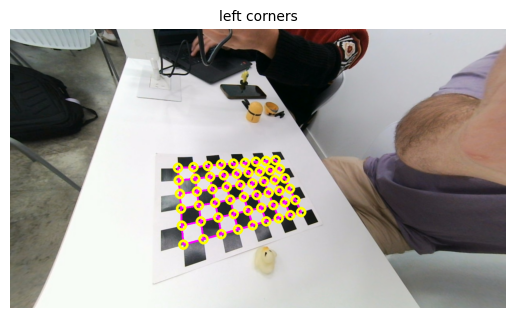

left corners found: True for image 5


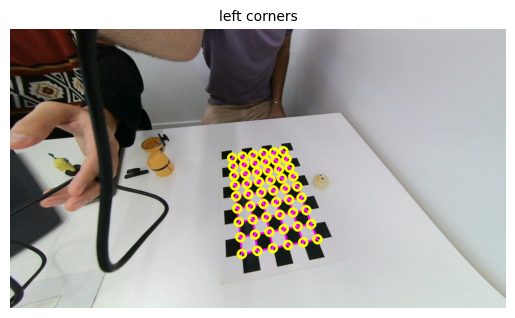

left corners found: True for image 6


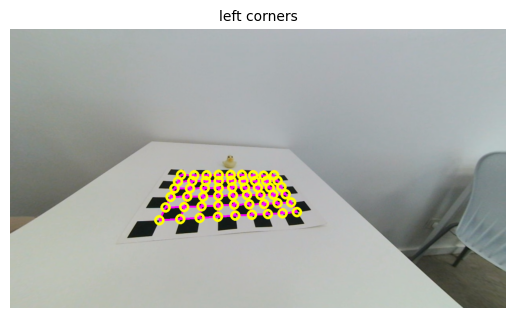

In [31]:
for idx in range(len(left_rectified_images)):
    left_img = left_rectified_images[idx].copy()
    # right_img = right_rectified_images[idx]
    left_img_gray = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
    
    show_boards = True
    checkerboard_path = "../datasets/own_data/checkerboard.txt"
    checkerboard, square_size_mm = load_checkerboard_config(checkerboard_path)
    left_found, left_corners = detect_board(checkerboard, left_img_gray)
    print(f"left corners found: {left_found} for image {idx}")
    if show_boards and left_found:
        draw_settings = {
        "corner_radius": 10,
        "corner_thickness": 5,
        "line_thickness": 4
        }
        left_image = draw_checkerboard(left_img, checkerboard, left_corners, True, **draw_settings)
        # right_image = draw_checkerboard(right_img, checkerboard, left_corners,  True, **draw_settings)
        # show_images([left_image, right_image])
        imshow(left_image, "left corners")


left corners found for image 1: True


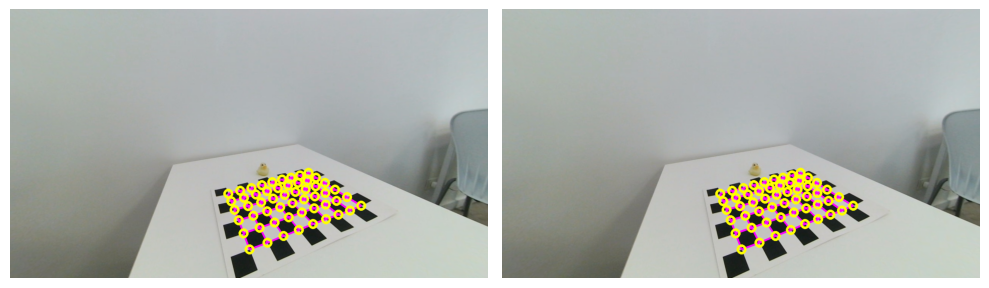

left corners found for image 2: True


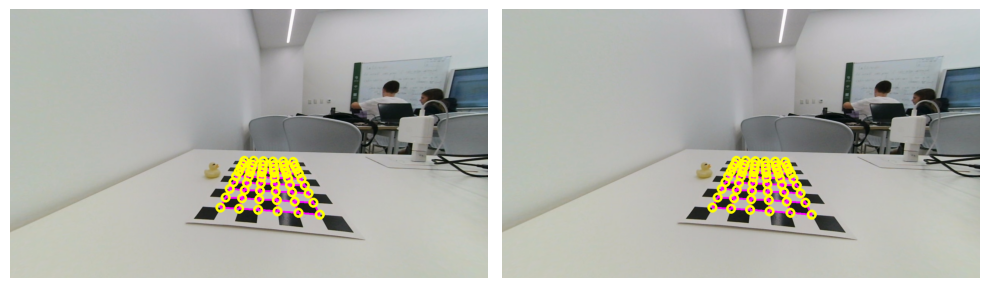

left corners found for image 3: True


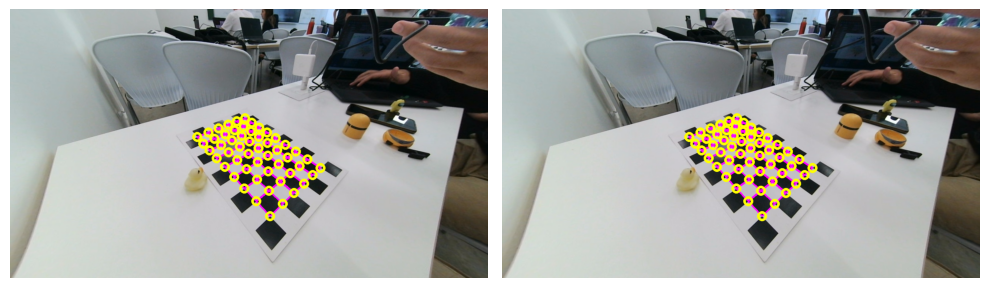

left corners found for image 4: True


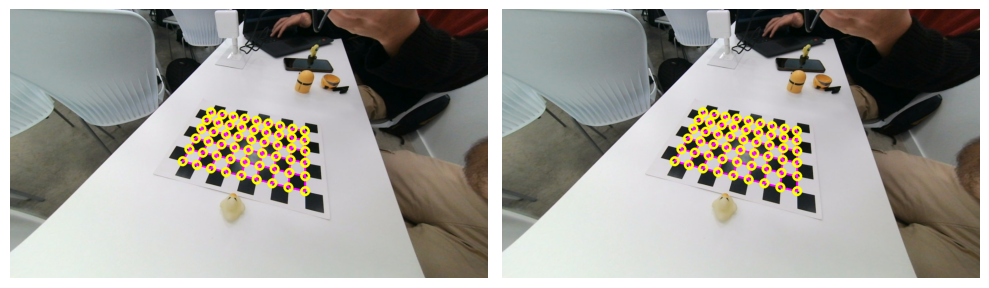

left corners found for image 5: True


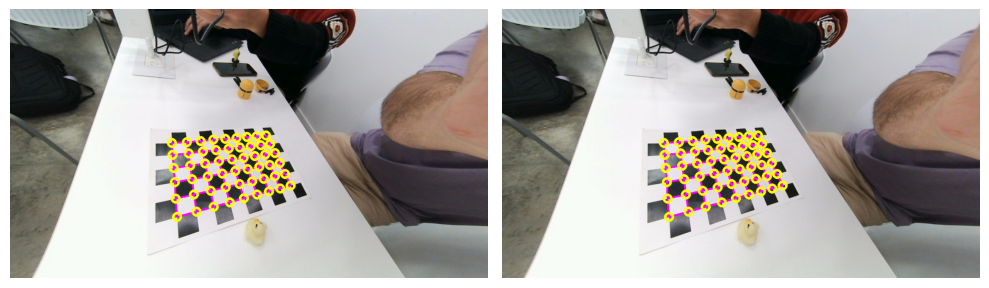

left corners found for image 6: True


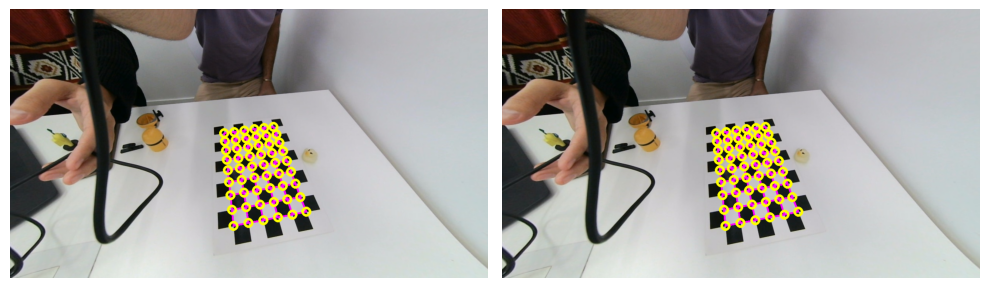

left corners found for image 7: True


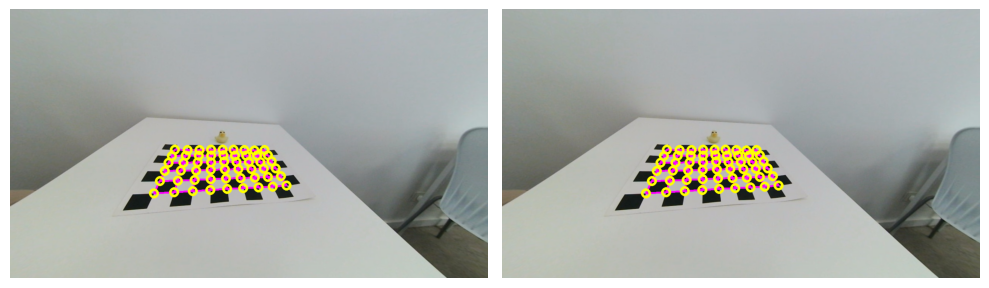

In [32]:
checkerboard_path = "../datasets/own_data/checkerboard.txt"
o_T_c_list = get_matrixs(left_rectified_images, calibration_results, checkerboard_path, True, True)
poses = {i: o_T_c_list[i] for i in range(len(o_T_c_list))}

In [33]:
all_points, all_colors = reconstruct(left_rectified_images, disparities, poses, rectification_results, show_pcd=False)

In [34]:
pcd = box_points(all_points, all_colors, 650, 600, 500, 30, 1.5)

In [35]:
path = "../datasets/own_data/duck/duck.ply"
o3d.io.write_point_cloud(path, pcd)


True

In [36]:
path = "../datasets/own_data/duck/duck_down.ply"
voxel_size = 0.05
pcd_down = pcd.voxel_down_sample(voxel_size=voxel_size)
o3d.io.write_point_cloud(path, pcd_down)

True

In [37]:
# mesh = create_mesh_from_point_cloud(pcd_down, voxel_size=10, max_nn=10, k=5)